In [1]:
from LightningModules import AutoEncoder, FUCCIDataModule, ReconstructionVisualization
from lightning.pytorch.loggers import WandbLogger
from microfilm import microplot
import torch

In [2]:
FUCCI_PATH = '/home/ishang/cross-modal-autoencoders/FUCCI-dev-data'
res = 1024

In [3]:
# project_name = f"FUCCI_{args.model}_VAE"
# wandb_logger = WandbLogger(
#     project=project_name,
#     log_model=True,
#     save_dir="/data/ishang/fucci_vae/wandb_logs"
# )

In [3]:
dm = FUCCIDataModule(
    data_dir=FUCCI_PATH,
    dataset="reference",
    imsize=res,
    split=(0.8, 0.1, 0.1),
    batch_size=8,
    num_workers=16
)

In [61]:
# print_with_time("Setting up Autoencoder...")
# encoder = Encoder(nc=2 if args.model in ["reference", "fucci"] else 4, imsize=config.imsize)
# decoder = Decoder(nc=2 if args.model in ["reference", "fucci"] else 4, imsize=config.imsize)
# model = AutoEncoder(encoder, decoder, lr=config.lr)


# trainer = pl.Trainer(
#     default_root_dir=f"/data/ishang/fucci_vae/lightning_logs/{project_name}",
#     accelerator="gpu",
#     devices=8,
#     # accelerator="cpu",
#     # fast_dev_run=10,
#     # detect_anomaly=True,
#     num_sanity_val_steps=2,
#     # overfit_batches=5,
#     # log_every_n_steps=10,
#     logger=wandb_logger,
#     max_epochs=100,
#     callbacks=[
#         EarlyStopping(monitor="val/loss", min_delta=config.min_delta, mode="min"),
#         LearningRateMonitor(logging_interval='step')
#     ]
# )

In [5]:
print(dm.dataset[:3].shape)
print(dm.dataset[0].shape)

torch.Size([3, 2, 1024, 1024])
torch.Size([2, 1024, 1024])


torch.Size([2, 3080, 2054])
(2, 3080, 2054)


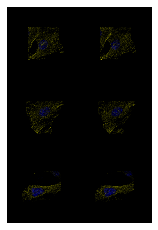

In [63]:
grid = ReconstructionVisualization.make_reconstruction_grid(dm.train_dataloader().dataset[:3], dm.val_dataloader().dataset[:3])
print(grid.shape)
cmap = ['pure_blue', 'pure_yellow', 'pure_green', 'pure_red']
img = np.moveaxis(tensor_to_image(grid), -1, 0)
print(img.shape)
microplot.microshow(images=img, cmaps=cmap[:2])

In [64]:
print(img.shape)
image_composite, _, _, _= multichannel_to_rgb(img, cmaps=cmap[:2])
print(type(image_composite))
print(image_composite.shape)
print(image_composite.dtype)
print(image_composite[350, 250])
print(np.max(image_composite[:, :, 0]))
print(np.min(image_composite[:, :, 0]))
image_composite = (255 * image_composite).astype(np.uint8)
image_composite = Image.fromarray(image_composite)
image_composite.save(f'test_grid_{res}.png')

(2, 3080, 2054)
<class 'numpy.ndarray'>
(3080, 2054, 4)
float64
[0. 0. 0. 1.]
1.0
0.0


In [6]:
from kornia import tensor_to_image
from microfilm.colorify import multichannel_to_rgb
import numpy as np
from PIL import Image

grid = ReconstructionVisualization.make_reconstruction_grid(dm.dataset[:3], dm.dataset[:3])
print(grid.shape)
img = np.moveaxis(tensor_to_image(grid), -1, 0)
print(img.shape)
image_composite, _, _, _= multichannel_to_rgb(img, cmaps=dm.dataset.channel_colors())
image_composite = (255 * image_composite).astype(np.uint8)
image_composite = Image.fromarray(image_composite)
image_composite.save(f'test_grid_{res}_composite.png')

torch.Size([2, 3080, 2054])
(2, 3080, 2054)
